In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image


In [4]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

In [5]:
xtrain.shape

(60000, 28, 28)

In [6]:
xtest.shape

(10000, 28, 28)

In [40]:
single_image= xtrain[4]

In [41]:
single_image.shape

(28, 28)

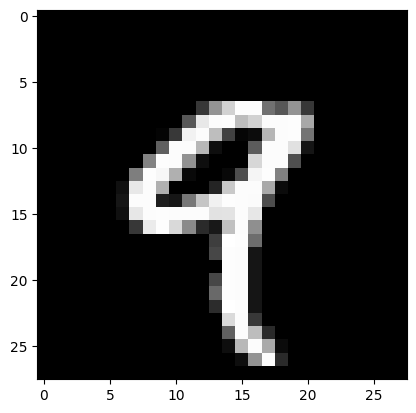

In [42]:
plt.imshow(single_image,cmap='gray')

In [24]:
ytrain.shape

(60000,)

In [25]:
xtrain.min()

0

In [26]:
xtrain.max()

255

In [28]:
xtrain_scaled = xtrain/255.0
xtest_scaled = xtest/255.0

In [29]:
xtrain_scaled.min()

0.0

In [30]:
xtrain_scaled.max()

1.0

In [43]:
ytrain[4]

9

In [44]:
ytrain_onehot = utils.to_categorical(ytrain,10)
ytest_onehot = utils.to_categorical(ytest,10)

In [46]:
type(ytrain_onehot)

numpy.ndarray

In [47]:
ytrain_onehot.shape

(60000, 10)

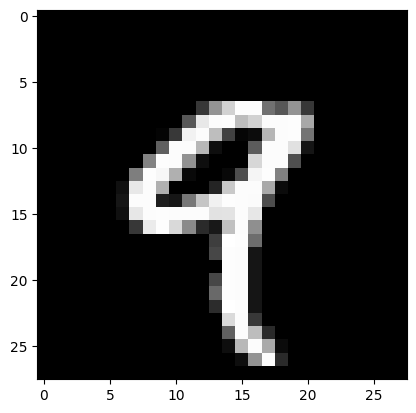

In [53]:
single_image = xtrain[4]
plt.imshow(single_image,cmap='gray')

In [52]:
ytrain_onehot[4]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [54]:
xtrain_scaled = xtrain_scaled.reshape(-1,28,28,1)
xtest_scaled = xtest_scaled.reshape(-1,28,28,1)

In [57]:
model= keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [59]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_3 (Dense)             (None, 16)                86544     
                                                                 
 dense_4 (Dense)             (None, 32)                544       
                                                                 
 dense_5 (Dense)             (None, 64)                2112      
                                                      

In [60]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

In [61]:
model.fit(xtrain_scaled ,ytrain_onehot, 
          epochs=8,batch_size=128, 
          validation_data=(xtest_scaled,ytest_onehot))

Epoch 1/8
469/469 [==============================] - 19s 38ms/step - loss: 0.4374 - accuracy: 0.8622 - val_loss: 0.1647 - val_accuracy: 0.9514
Epoch 2/8
469/469 [==============================] - 16s 34ms/step - loss: 0.1350 - accuracy: 0.9600 - val_loss: 0.1089 - val_accuracy: 0.9670
Epoch 3/8
469/469 [==============================] - 15s 33ms/step - loss: 0.0894 - accuracy: 0.9729 - val_loss: 0.0789 - val_accuracy: 0.9758
Epoch 4/8
469/469 [==============================] - 16s 35ms/step - loss: 0.0689 - accuracy: 0.9790 - val_loss: 0.0748 - val_accuracy: 0.9755
Epoch 5/8
469/469 [==============================] - 17s 36ms/step - loss: 0.0586 - accuracy: 0.9825 - val_loss: 0.0661 - val_accuracy: 0.9790
Epoch 6/8
469/469 [==============================] - 16s 33ms/step - loss: 0.0480 - accuracy: 0.9855 - val_loss: 0.0593 - val_accuracy: 0.9812
Epoch 7/8
469/469 [==============================] - 16s 34ms/step - loss: 0.0420 - accuracy: 0.9867 - val_loss: 0.0563 - val_accuracy: 0.9817

In [62]:
metrics = pd.DataFrame(model.history.history)
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.437409,0.862233,0.164701,0.9514
1,0.134976,0.959983,0.108911,0.9670
2,0.089441,0.972917,0.078944,0.9758
3,0.068941,0.978983,0.074781,0.9755
4,0.058574,0.982450,0.066054,0.9790


<Axes: >

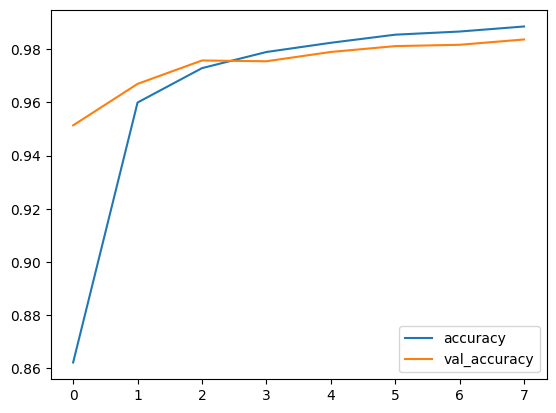

In [63]:
metrics[['accuracy','val_accuracy']].plot()

<Axes: >

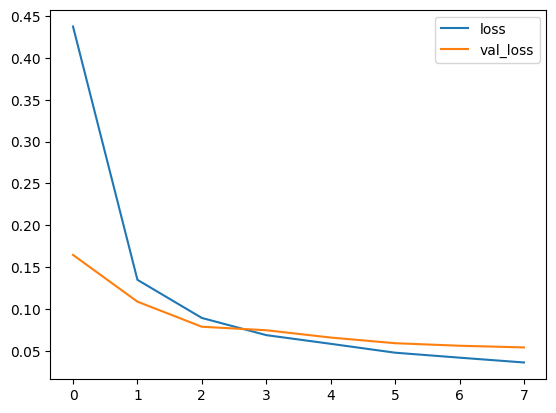

In [64]:
metrics[['loss','val_loss']].plot()

In [65]:
xtest_predictions = np.argmax(model.predict(xtest_scaled), axis=1)

313/313 [==============================] - 1s 4ms/step


In [67]:
print(confusion_matrix(ytest,xtest_predictions))

[[ 976    0    1    0    0    0    1    0    1    1]
 [   0 1128    6    0    0    0    1    0    0    0]
 [   3    1 1016    2    2    0    0    7    1    0]
 [   0    0    2  994    0    4    0    4    5    1]
 [   3    0    1    0  964    0    3    1    2    8]
 [   3    0    1    6    0  871    6    0    2    3]
 [   7    3    0    0    1    2  944    0    1    0]
 [   1    3   12    0    1    0    0 1008    1    2]
 [   6    0    6    1    2    1    1    3  950    4]
 [   3    0    0    0    6    2    0    5    7  986]]


In [68]:
print(classification_report(ytest,xtest_predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.99      0.98      0.99      1010
           4       0.99      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



Prediction for a single input

In [69]:
img = image.load_img('dl.png')
type(img)
img = image.load_img('dl.png')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [70]:
x_single_prediction = np.argmax(model.predict(img_28_gray_scaled.reshape(1,28,28,1)),axis=1)

1/1 [==============================] - 0s 17ms/step


In [71]:
print(x_single_prediction)

[9]


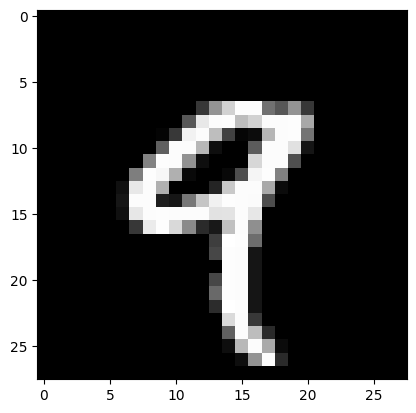

In [72]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

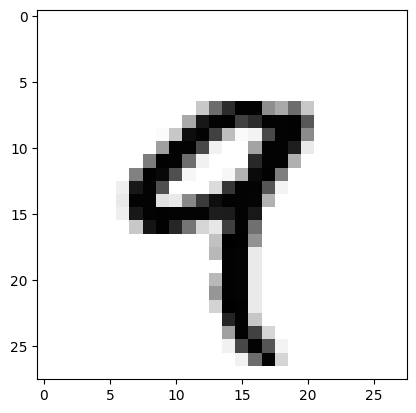

In [73]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0
plt.imshow(img_28_gray_inverted_scaled.reshape(28,28),cmap='gray')

In [74]:
x_single_prediction = np.argmax(model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)), axis=1)

1/1 [==============================] - 0s 93ms/step


In [75]:
print(x_single_prediction)

[9]
